In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
"""
This script extracts the contents of a specified ZIP file to a designated directory.
It is intended to be used within a Google Drive environment, where the ZIP file is located
in the Google Drive storage and the target directory is also on Google Drive. The script
first checks if the target directory exists and creates it if it does not. Then, it
proceeds to extract all contents of the ZIP file into the target directory.

Parameters:
- zip_file_path: A string specifying the path to the ZIP file on Google Drive.
                 Adjust this path to point to the actual ZIP file location.
- extract_to_path: A string specifying the target directory on Google Drive where
                   the contents of the ZIP file will be extracted. Adjust this path
                   to your preferred extraction location.

Note: Make sure to mount your Google Drive if running this script in a Google Colab
environment to access the drive's filesystem.
"""

import zipfile
import os

# Path to your zip file on Google Drive
zip_file_path = '/content/drive/MyDrive/RecSys-20240213T045048Z-001.zip' # Adjust this path

# Path where you want to extract the files
extract_to_path = '/content/drive/MyDrive/RecSys' # Adjust this path

# Make sure the extract_to_path exists
if not os.path.exists(extract_to_path):
    os.makedirs(extract_to_path)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Files extracted successfully!")


In [ ]:
import pandas as pd

# Load the episodes dataset
episodes_df = pd.read_csv('/content/drive/MyDrive/RS_CP1/deepak_episode.csv')
# Load the dialogues dataset
dialogues_df = pd.read_csv('/content/drive/MyDrive/RS_CP1/deepak_dialogue.csv')


In [ ]:
categories = episodes_df['program'].unique()

In [ ]:
categories

array(['Morning Edition', 'All Things Considered',
       'Weekend Edition Saturday', 'Talk of the Nation', 'News & Notes',
       'Day to Day', 'Weekend Edition Sunday'], dtype=object)

In [ ]:
sampled_dfs = []

# Loop through each category and sample 120 rows, or the maximum available if less than 500
for category in categories:
    # Sample rows for the current category
    category_df = episodes_df[episodes_df['program'] == category]
    n_samples = min(120, len(category_df))
    category_sample = category_df.sample(n=n_samples, random_state=1)
    sampled_dfs.append(category_sample)

# Concatenate all the sampled DataFrames into one
sampled_df = pd.concat(sampled_dfs, ignore_index=True)

# Display the shape of the sampled DataFrame to verify the number of rows and a few rows to confirm the data
sampled_df.shape, sampled_df.head()

((840, 6),
    Unnamed: 0      id          program  \
 0       44735  106073  Morning Edition   
 1       92678   84542  Morning Edition   
 2      103078   95828  Morning Edition   
 3       19248  119324  Morning Edition   
 4       36705  137949  Morning Edition   
 
                                                title episode_date  \
 0    In Alabama, A Shortage Of Shelter For Survivors   2011-05-04   
 1  Already A Movie Topic, Iran's Revolution Is No...   2016-04-20   
 2  Verizon Creates Shock Waves With Planned Debt ...   2013-09-10   
 3  InBev Registers $46 Billion Bid for Anheuser-B...   2008-06-12   
 4  More Americans Support Iraq Inspections, Polls...   2003-03-04   
 
                                      processed_ep  
 0               alabama shortage shelter survivor  
 1  already movie topic iran revolution video game  
 2    verizon creates shock wave planned debt sale  
 3     inbev register 46 billion bid anheuserbusch  
 4      american support iraq inspection p

In [ ]:
sampled_df

,Unnamed: 0,id,program,title,episode_date,processed_ep
0,44735,106073,Morning Edition,"In Alabama, A Shortage Of Shelter For Survivors",2011-05-04,alabama shortage shelter survivor
1,92678,84542,Morning Edition,"Already A Movie Topic, Iran's Revolution Is No...",2016-04-20,already movie topic iran revolution video game
2,103078,95828,Morning Edition,Verizon Creates Shock Waves With Planned Debt ...,2013-09-10,verizon creates shock wave planned debt sale
3,19248,119324,Morning Edition,InBev Registers $46 Billion Bid for Anheuser-B...,2008-06-12,inbev register 46 billion bid anheuserbusch
4,36705,137949,Morning Edition,"More Americans Support Iraq Inspections, Polls...",2003-03-04,american support iraq inspection poll show
...,...,...,...,...,...,...
835,66023,55164,Weekend Edition Sunday,Brazil Election Caps A Dramatic Campaign Season,2014-10-05,brazil election cap dramatic campaign season
836,91724,83483,Weekend Edition Sunday,Afghanistan Holds Legislative Elections,2005-09-18,afghanistan hold legislative election
837,78004,68706,Weekend Edition Sunday,"Foreigners Flee Libya, If They Can",2011-02-27,foreigner flee libya
838,46564,70435,Weekend Edition Sunday,Mexico Drug War Leaves Hundreds Dead,2010-06-20,mexico drug war leaf hundred dead


In [ ]:
# sampled_df = sampled_df.drop('episode_date', axis=1)

In [ ]:
sampled_df

,Unnamed: 0,id,program,title,episode_date,processed_ep
0,44735,106073,Morning Edition,"In Alabama, A Shortage Of Shelter For Survivors",2011-05-04,alabama shortage shelter survivor
1,92678,84542,Morning Edition,"Already A Movie Topic, Iran's Revolution Is No...",2016-04-20,already movie topic iran revolution video game
2,103078,95828,Morning Edition,Verizon Creates Shock Waves With Planned Debt ...,2013-09-10,verizon creates shock wave planned debt sale
3,19248,119324,Morning Edition,InBev Registers $46 Billion Bid for Anheuser-B...,2008-06-12,inbev register 46 billion bid anheuserbusch
4,36705,137949,Morning Edition,"More Americans Support Iraq Inspections, Polls...",2003-03-04,american support iraq inspection poll show
...,...,...,...,...,...,...
835,66023,55164,Weekend Edition Sunday,Brazil Election Caps A Dramatic Campaign Season,2014-10-05,brazil election cap dramatic campaign season
836,91724,83483,Weekend Edition Sunday,Afghanistan Holds Legislative Elections,2005-09-18,afghanistan hold legislative election
837,78004,68706,Weekend Edition Sunday,"Foreigners Flee Libya, If They Can",2011-02-27,foreigner flee libya
838,46564,70435,Weekend Edition Sunday,Mexico Drug War Leaves Hundreds Dead,2010-06-20,mexico drug war leaf hundred dead


In [ ]:
unique_ids = sampled_df['id'].unique()

# Find the rows in the 'Utterances' dataset where the unique ID matches the 3500 unique IDs
matching_rows = dialogues_df[dialogues_df['episode'].isin(unique_ids)]


In [ ]:
matching_rows.shape

(30372, 6)

In [ ]:
matching_rows.head()

,Unnamed: 0,episode,episode_order,speaker,utterance,processed_dialogue
586,586,80598,3,SHO BARAKA,If you're tired of being forced to choose betw...,youre tired forced choose social justice bibli...
650,650,80598,1,"DAVID GREENE, HOST",What you're about to hear is a pitch for a pol...,youre hear pitch political movement
751,751,80598,4,"DAVID GREENE, HOST",It's from a hip-hop artist who says he feels l...,hiphop artist say feel like given false choice...
752,752,80598,5,"DAVID GREENE, HOST",Defend the tea party as a successful movement ...,defend tea party successful movement model min...
753,753,80598,6,SHO BARAKA,"Well, no, I (laughter) I don't know if I'm goi...",well laughter dont know im going defend succes...


In [ ]:
matching_rows= matching_rows.drop("utterance",axis =1)

In [ ]:
matching_rows.head()

,Unnamed: 0,episode,episode_order,speaker,processed_dialogue
586,586,80598,3,SHO BARAKA,youre tired forced choose social justice bibli...
650,650,80598,1,"DAVID GREENE, HOST",youre hear pitch political movement
751,751,80598,4,"DAVID GREENE, HOST",hiphop artist say feel like given false choice...
752,752,80598,5,"DAVID GREENE, HOST",defend tea party successful movement model min...
753,753,80598,6,SHO BARAKA,well laughter dont know im going defend succes...


In [1]:
def check_null_columns(df):
  """
    Checks for and prints columns in the provided DataFrame that contain null values, along with the count of null values in each column.

    This function iterates through the DataFrame to find any columns that have null values. For each column with null values, it prints the column name followed by the count of null values in that column. If no columns with null values are found, it prints a message indicating that no null values were found.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame to be checked for null values.

    Returns:
    - None: This function does not return anything. It only prints to the console.
    """
  # Step 2: Null Value Check
  # Identify columns with null values
  null_columns = df.columns[df.isnull().any()]

  # Print columns with null values and their respective count of nulls
  if len(null_columns) > 0:
      print("Columns with null values and their count of nulls:")
      for col in null_columns:
          print(f"{col}: {df[col].isnull().sum()}")
  else:
      print("No columns with null values found.")
print("episodes_df:")
check_null_columns(sampled_df)
print("-------------------------------")
check_null_columns(matching_rows)
print("-------------------------------")

episodes_df:


NameError: name 'sampled_df' is not defined

In [ ]:
import pandas as pd

def check_and_remove_nulls_drop_rows_only(df):
    """
    Checks for null values in the DataFrame and removes rows with null values.
    Columns are preserved.

    Parameters:
    - df: pandas DataFrame.
    """
    # Step 1: Check for null values
    null_columns = df.columns[df.isnull().any()]
    if len(null_columns) > 0:
        print("Columns with null values and their count of nulls:")
        for col in null_columns:
            print(f"{col}: {df[col].isnull().sum()}")
        # Step 2: Drop rows with any null value
        cleaned_df = df.dropna()
        print("Rows with null values have been removed.")
    else:
        print("No columns with null values found.")
        cleaned_df = df  # No changes needed

    return cleaned_df

# Example usage:
print("episodes_df:")
sampled_df = check_and_remove_nulls_drop_rows_only(sampled_df)
print("-------------------------------")
print("dialogues_df:")
matching_rows = check_and_remove_nulls_drop_rows_only(matching_rows)
print("-------------------------------")


episodes_df:
No columns with null values found.
-------------------------------
dialogues_df:
Columns with null values and their count of nulls:
processed_dialogue: 156
Rows with null values have been removed.
-------------------------------


In [ ]:
check_null_columns(sampled_df)
print("-------------------------------")
check_null_columns(matching_rows)
print("-------------------------------")

No columns with null values found.
-------------------------------
No columns with null values found.
-------------------------------


In [ ]:
sampled_df.head()

,Unnamed: 0,id,program,title,episode_date,processed_ep
0,44735,106073,Morning Edition,"In Alabama, A Shortage Of Shelter For Survivors",2011-05-04,alabama shortage shelter survivor
1,92678,84542,Morning Edition,"Already A Movie Topic, Iran's Revolution Is No...",2016-04-20,already movie topic iran revolution video game
2,103078,95828,Morning Edition,Verizon Creates Shock Waves With Planned Debt ...,2013-09-10,verizon creates shock wave planned debt sale
3,19248,119324,Morning Edition,InBev Registers $46 Billion Bid for Anheuser-B...,2008-06-12,inbev register 46 billion bid anheuserbusch
4,36705,137949,Morning Edition,"More Americans Support Iraq Inspections, Polls...",2003-03-04,american support iraq inspection poll show


In [ ]:
matching_rows.head()

,Unnamed: 0,episode,episode_order,speaker,processed_dialogue
586,586,80598,3,SHO BARAKA,youre tired forced choose social justice bibli...
650,650,80598,1,"DAVID GREENE, HOST",youre hear pitch political movement
751,751,80598,4,"DAVID GREENE, HOST",hiphop artist say feel like given false choice...
752,752,80598,5,"DAVID GREENE, HOST",defend tea party successful movement model min...
753,753,80598,6,SHO BARAKA,well laughter dont know im going defend succes...


In [ ]:
import pandas as pd

def drop_unnamed_columns(df):
    """
    Drops columns that are unnamed from the DataFrame.

    Parameters:
    - df: pandas DataFrame.

    Returns:
    - DataFrame without any 'Unnamed' columns.
    """
    # Identify columns that start with 'Unnamed'
    unnamed_cols = [col for col in df.columns if col.startswith('Unnamed')]

    # Drop these columns
    df_cleaned = df.drop(columns=unnamed_cols, errors='ignore')

    return df_cleaned

# Example usage:
# Assuming episodes_df is your DataFrame that might contain 'Unnamed' columns.
sampled_df = drop_unnamed_columns(sampled_df)
print("Unnamed columns dropped (if any were present).")
matching_rows = drop_unnamed_columns(matching_rows)
print("Unnamed columns dropped (if any were present).")

Unnamed columns dropped (if any were present).
Unnamed columns dropped (if any were present).


In [ ]:
sampled_df.head()

,id,program,title,episode_date,processed_ep
0,106073,Morning Edition,"In Alabama, A Shortage Of Shelter For Survivors",2011-05-04,alabama shortage shelter survivor
1,84542,Morning Edition,"Already A Movie Topic, Iran's Revolution Is No...",2016-04-20,already movie topic iran revolution video game
2,95828,Morning Edition,Verizon Creates Shock Waves With Planned Debt ...,2013-09-10,verizon creates shock wave planned debt sale
3,119324,Morning Edition,InBev Registers $46 Billion Bid for Anheuser-B...,2008-06-12,inbev register 46 billion bid anheuserbusch
4,137949,Morning Edition,"More Americans Support Iraq Inspections, Polls...",2003-03-04,american support iraq inspection poll show


In [ ]:
matching_rows.head()

,episode,episode_order,speaker,processed_dialogue
586,80598,3,SHO BARAKA,youre tired forced choose social justice bibli...
650,80598,1,"DAVID GREENE, HOST",youre hear pitch political movement
751,80598,4,"DAVID GREENE, HOST",hiphop artist say feel like given false choice...
752,80598,5,"DAVID GREENE, HOST",defend tea party successful movement model min...
753,80598,6,SHO BARAKA,well laughter dont know im going defend succes...


In [ ]:
import re
from bs4 import BeautifulSoup

# Function to remove HTML tags
def remove_html_tags(text):
    """
      Removes HTML tags from a given text string using BeautifulSoup.

      Parameters:
      - text (str): A string containing HTML tags.

      Returns:
      - str: The input string with all HTML tags removed, leaving only the visible text content.
    """
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function to clean text data
def clean_text(text):
    """
      Cleans a text string by removing HTML tags, replacing multiple spaces with a single space,
      trimming leading and trailing spaces, and converting all characters to lowercase.

      The function sequentially processes the input text by first removing HTML tags, then
      addressing whitespace issues, and finally adjusting the case of the text. This results in a
      normalized string that is suitable for further text processing or analysis.

      Parameters:
      - text (str): The input text string to be cleaned.

      Returns:
      - str: The cleaned text string.
    """
    text = remove_html_tags(text)  # Remove HTML tags
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = text.strip().lower()  # Trim leading/trailing spaces and convert to lowercase
    return text


In [ ]:
sampled_df['processed_ep'] = sampled_df['processed_ep'].apply(clean_text)
matching_rows['processed_dialogue'] = matching_rows['processed_dialogue'].apply(clean_text)

In [ ]:
import re

def contains_html_tags(text):
    """
    Checks if the given text contains any HTML tags.

    Parameters:
    - text: String to check for HTML tags.

    Returns:
    - Boolean: True if HTML tags are found, False otherwise.
    """
    # Regular expression to match HTML tags
    html_tag_pattern = re.compile(r'<[^>]+>')

    # Search text for any matches to the pattern
    return bool(html_tag_pattern.search(text))

# Example usage:
# Assuming episodes_df is your DataFrame and 'processed_ep' is a column you want to check.
html_tags_in_processed_ep = sampled_df['processed_ep'].apply(contains_html_tags)
html_tags_in_processed_dialogue = matching_rows['processed_dialogue'].apply(contains_html_tags)

# Checking if any row has HTML tags in 'processed_ep' or 'title' columns
any_html_tags_in_processed_ep = any(html_tags_in_processed_ep)
any_html_tags_in_processed_dialogue = any(html_tags_in_processed_dialogue)

print(f"Any HTML tags in 'processed_ep': {any_html_tags_in_processed_ep}")
print(f"Any HTML tags in 'processed_dialogue': {any_html_tags_in_processed_dialogue}")


Any HTML tags in 'processed_ep': False
Any HTML tags in 'processed_dialogue': False


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('punkt')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    """
    Tokenizes and lemmatizes the input text.

    Parameters:
    - text: String containing the text to be lemmatized.

    Returns:
    - String with each word lemmatized.
    """
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the lemmatized words back into a single string
    return ' '.join(lemmatized_words)

# Apply the lemmatization function to the 'processed_ep' column
sampled_df['processed_ep'] = sampled_df['processed_ep'].apply(lemmatize_text)
matching_rows['processed_dialogue'] = matching_rows['processed_dialogue'].apply(lemmatize_text)
# Print the first few rows to verify the changes
print(sampled_df['processed_ep'].head())
print(matching_rows['processed_dialogue'].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0                 alabama shortage shelter survivor
1    already movie topic iran revolution video game
2      verizon creates shock wave planned debt sale
3       inbev register 46 billion bid anheuserbusch
4        american support iraq inspection poll show
Name: processed_ep, dtype: object
586    youre tired forced choose social justice bibli...
650                  youre hear pitch political movement
751    hiphop artist say feel like given false choice...
752    defend tea party successful movement model min...
753    well laughter dont know im going defend succes...
Name: processed_dialogue, dtype: object


In [ ]:
sampled_df.to_csv('/content/drive/MyDrive/RS_CP1/new_sampled.csv', index=False)

In [ ]:
# Get a concise summary of the dataframe
print(sampled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            840 non-null    int64 
 1   program       840 non-null    object
 2   title         840 non-null    object
 3   episode_date  840 non-null    object
 4   processed_ep  840 non-null    object
dtypes: int64(1), object(4)
memory usage: 32.9+ KB
None


In [ ]:
# Summary statistics for numerical columns
print(sampled_df.describe())

                  id
count     840.000000
mean    62809.454762
std     35551.040421
min        68.000000
25%     33889.000000
50%     64065.500000
75%     82745.250000
max    141064.000000


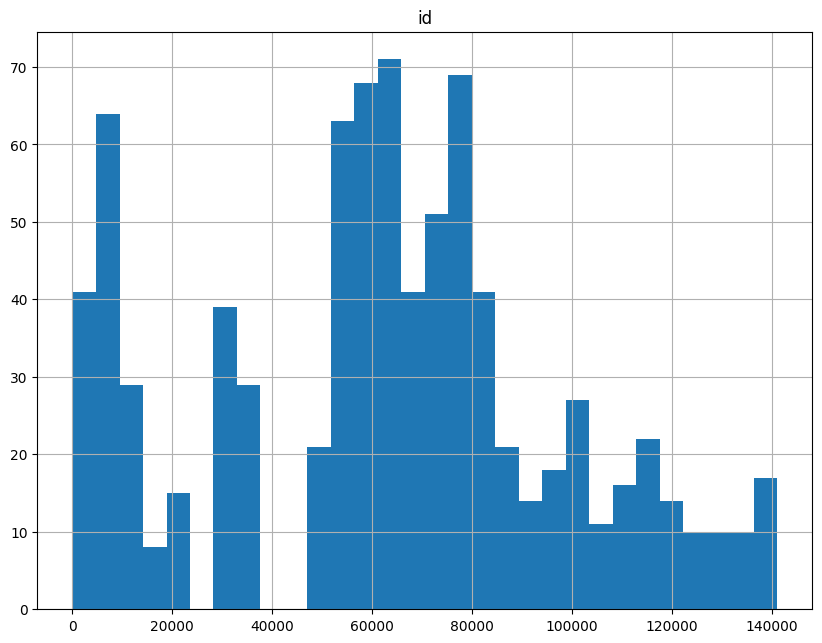

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
sampled_df.hist(bins=30, figsize=(10, 7.5))
plt.show()


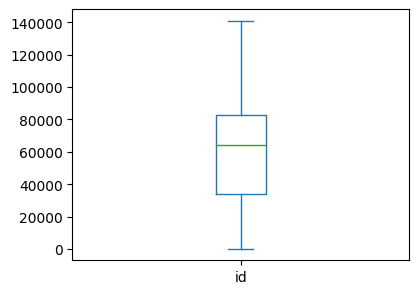

In [ ]:
# Box plots for numerical columns to identify outliers
sampled_df.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,15))
plt.show()


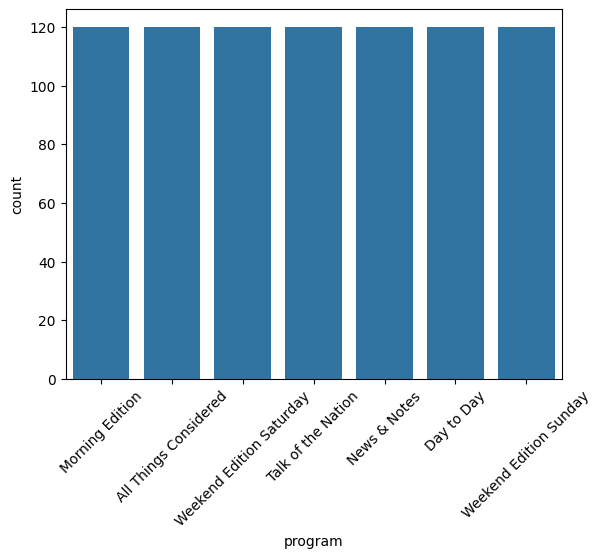

In [ ]:
# For categorical data, count plots can be useful
# Assuming the column with categories is named 'program'
sns.countplot(x='program', data=sampled_df)
plt.xticks(rotation=45) # This rotates the x-axis labels to make them more readable
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd

# Convert 'episode_date' to datetime format and extract year, month, and day
sampled_df['episode_date'] = pd.to_datetime(sampled_df['episode_date'])
sampled_df['year'] = sampled_df['episode_date'].dt.year
sampled_df['month'] = sampled_df['episode_date'].dt.month
sampled_df['day'] = sampled_df['episode_date'].dt.day

# Calculate the number of words in each episode's title
sampled_df['title_length'] = sampled_df['title'].apply(lambda x: len(x.split()))

# Example analysis: Print the number of episodes per program
print("Number of episodes per program:")
print(sampled_df['program'].value_counts())

# Example analysis: Average title length by year
print("Average title length by year:")
print(sampled_df.groupby('year')['title_length'].mean())


Number of episodes per program:
Morning Edition             120
All Things Considered       120
Weekend Edition Saturday    120
Talk of the Nation          120
News & Notes                120
Day to Day                  120
Weekend Edition Sunday      120
Name: program, dtype: int64
Average title length by year:
year
2003     5.200000
2004     7.000000
2005     6.135593
2006     6.447368
2007     5.974138
2008     6.252632
2009     6.481481
2010     6.685714
2011     7.428571
2012     7.731343
2013     8.263158
2014     8.657895
2015     9.733333
2016     9.048780
2017     9.707317
2018    10.153846
2019     9.625000
Name: title_length, dtype: float64


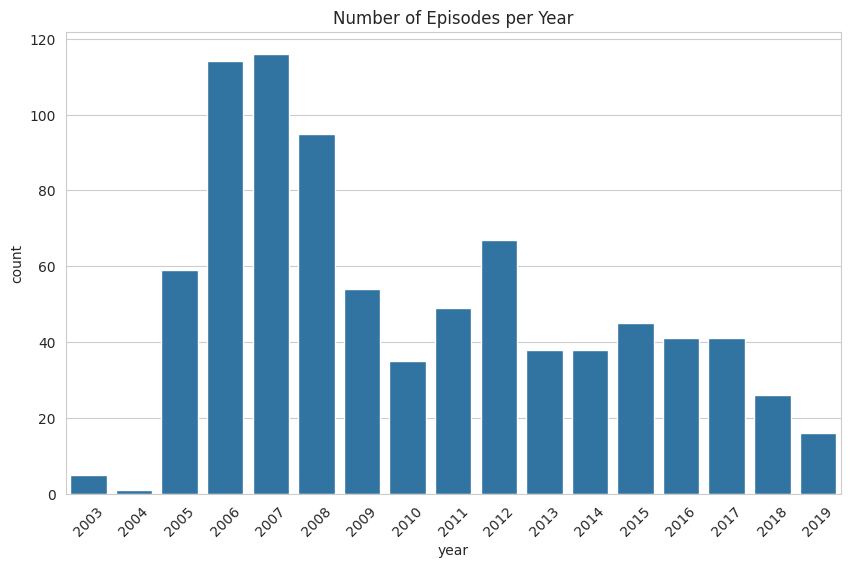

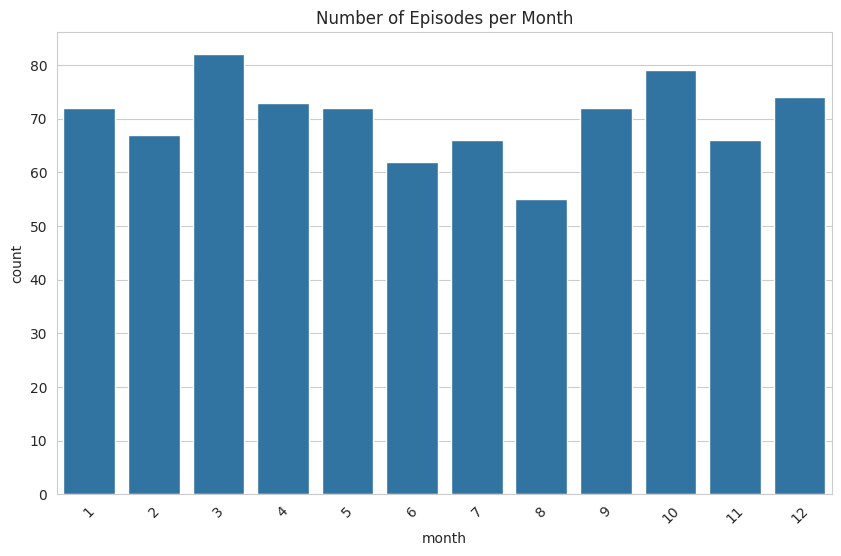

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Episodes per year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=sampled_df)
plt.title('Number of Episodes per Year')
plt.xticks(rotation=45)
plt.show()

# Episodes per month (regardless of year)
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=sampled_df)
plt.title('Number of Episodes per Month')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sampled_df is your DataFrame and 'episode_date' is a datetime column
# If 'year' and 'month' columns aren't already there, extract them
sampled_df['year'] = sampled_df['episode_date'].dt.year
sampled_df['month'] = sampled_df['episode_date'].dt.month


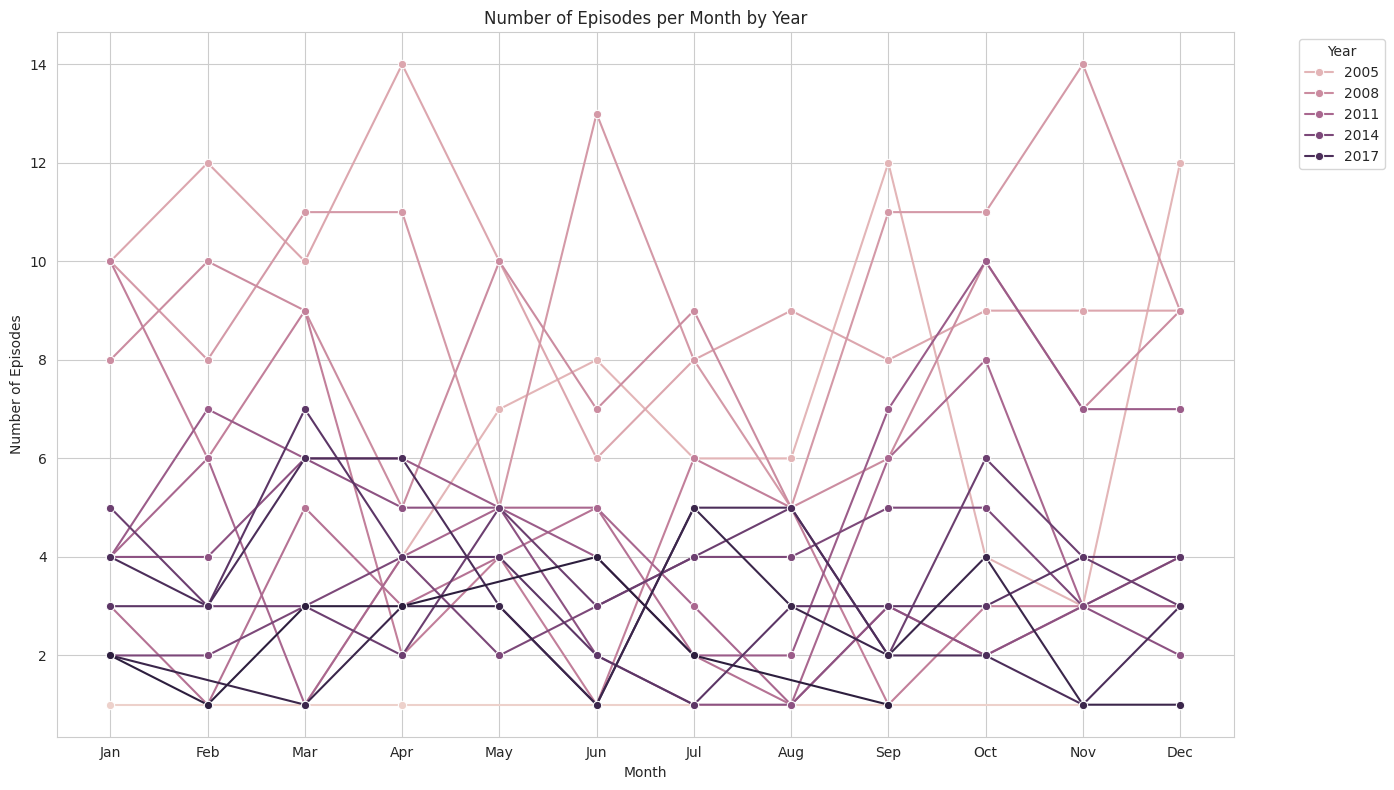

In [ ]:
# Group by year and month, then count the episodes
episodes_per_month_year = sampled_df.groupby(['year', 'month']).size().reset_index(name='episodes')
plt.figure(figsize=(14, 8))
sns.lineplot(data=episodes_per_month_year, x='month', y='episodes', hue='year', marker='o')
plt.title('Number of Episodes per Month by Year')
plt.xlabel('Month')
plt.ylabel('Number of Episodes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


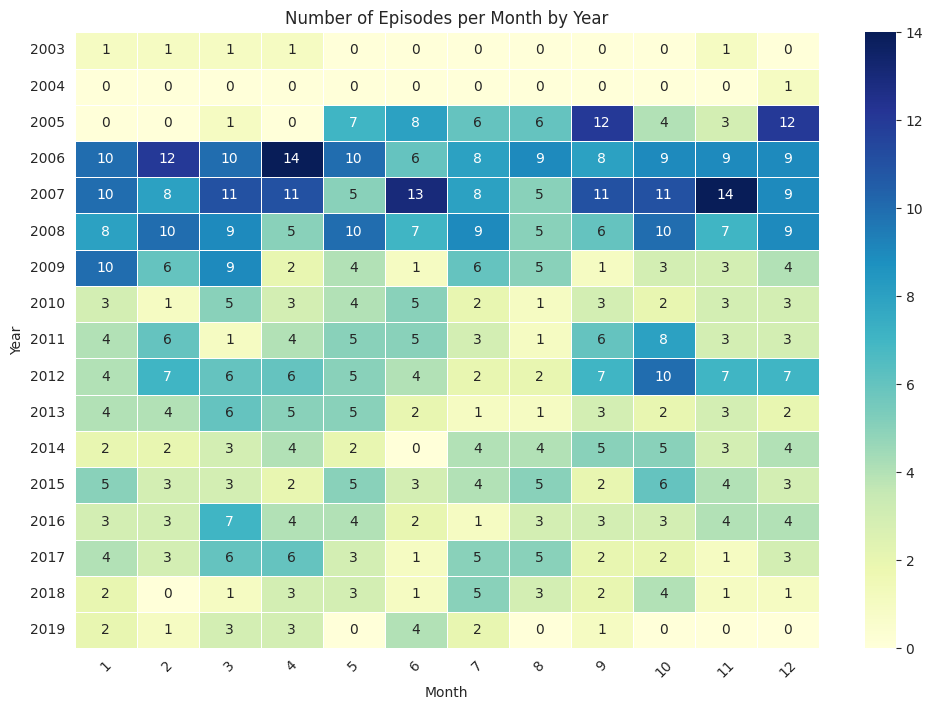

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming sampled_df already has 'year' and 'month' columns
# Create a pivot table for the heatmap
pivot_table = sampled_df.pivot_table(index='year', columns='month', values='id', aggfunc='count')

# Fill NaN values with 0 if there are months with no episodes
pivot_table = pivot_table.fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Number of Episodes per Month by Year')
plt.xlabel('Month')
plt.ylabel('Year')

# Set the y-axis labels (years) to be displayed vertically
plt.yticks(rotation=0)  # This makes the y-axis labels horizontal; use rotation=90 for vertical

# Set the x-axis labels (months) to be displayed with a rotation for better spacing
plt.xticks(rotation=45)  # This rotates the x-axis labels to make them more readable

plt.show()


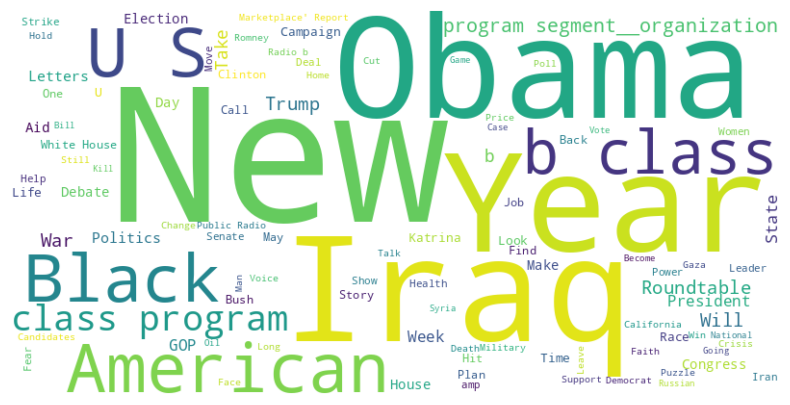

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import calendar


# Combine all titles into a single string
all_titles = ' '.join(sampled_df['title'].tolist())

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, width=800, height=400).generate(all_titles)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
matching_rows.to_csv('/content/drive/MyDrive/RS_CP1/new_dialogue_dataset.csv', index=False)

In [ ]:
# Summary of the dataset
print(matching_rows.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30216 entries, 586 to 3190113
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   episode             30216 non-null  int64 
 1   episode_order       30216 non-null  int64 
 2   speaker             30216 non-null  object
 3   processed_dialogue  30216 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB
None


In [ ]:
matching_rows.shape

(30216, 4)

In [ ]:
# Basic statistics for numerical columns
print(matching_rows.describe())

             episode  episode_order
count   30216.000000   30216.000000
mean    58240.057850      38.370830
std     32797.191061      40.616643
min        68.000000       0.000000
25%     33492.000000      10.000000
50%     61676.000000      22.000000
75%     77764.000000      53.000000
max    140370.000000     251.000000


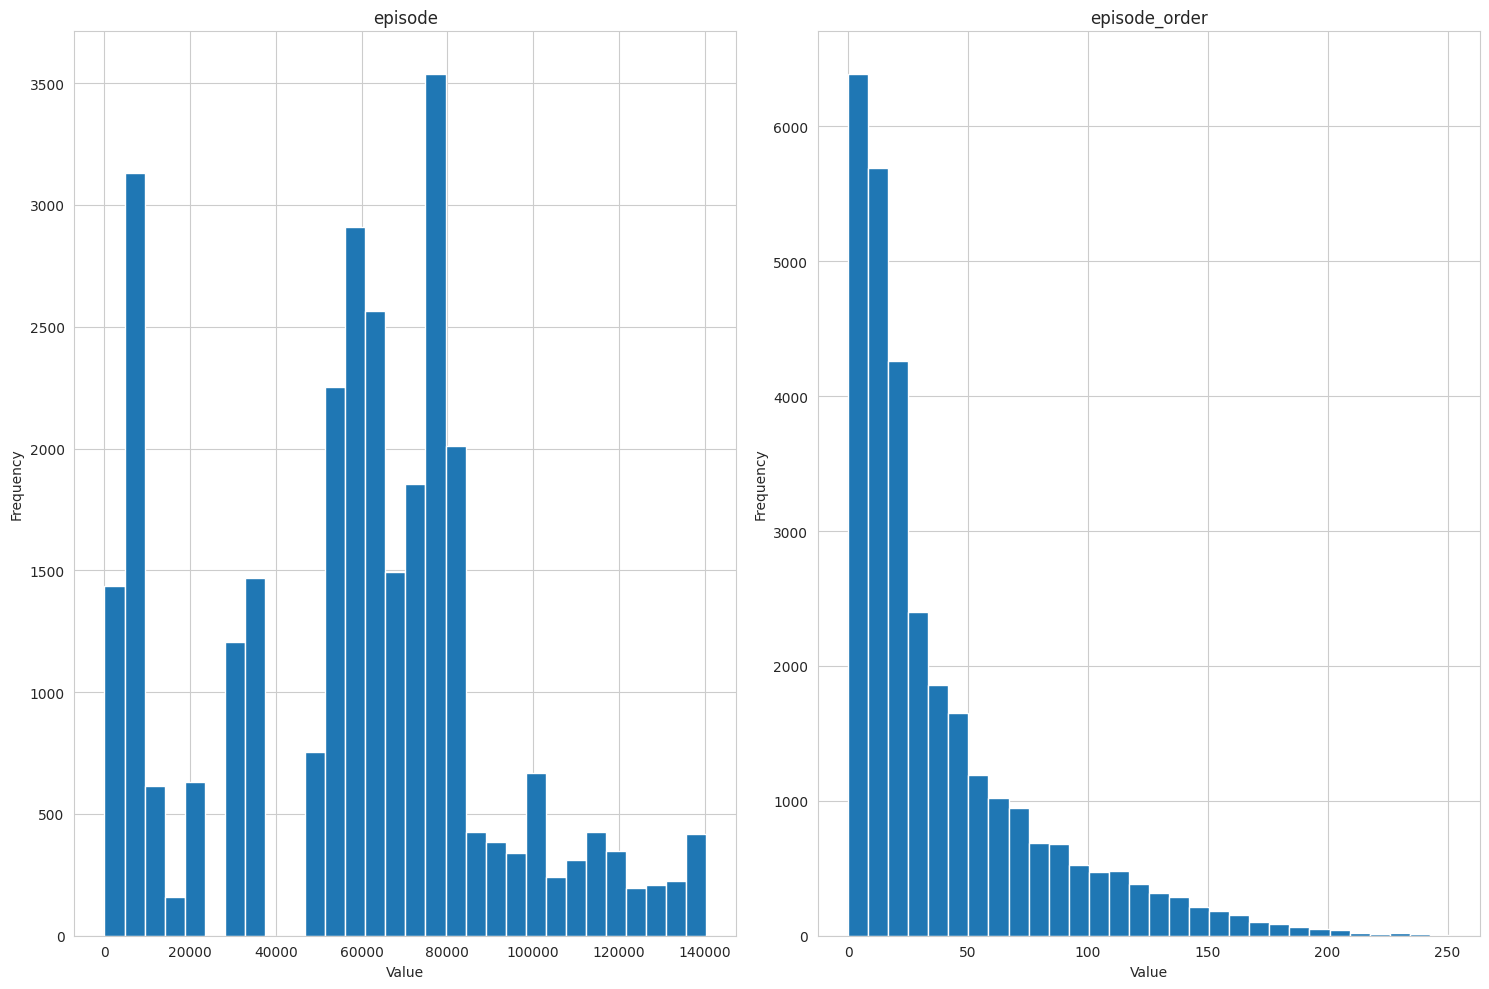

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_dialogue is already loaded and contains numerical columns

# Generate histograms for all numerical columns
axes = matching_rows.hist(bins=30, figsize=(15, 10))

# Iterate over each subplot to set x and y labels
for ax in axes.flatten():
    ax.set_xlabel('Value')  # Set the x label as 'Value'
    ax.set_ylabel('Frequency')  # Set the y label as 'Frequency'

plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()



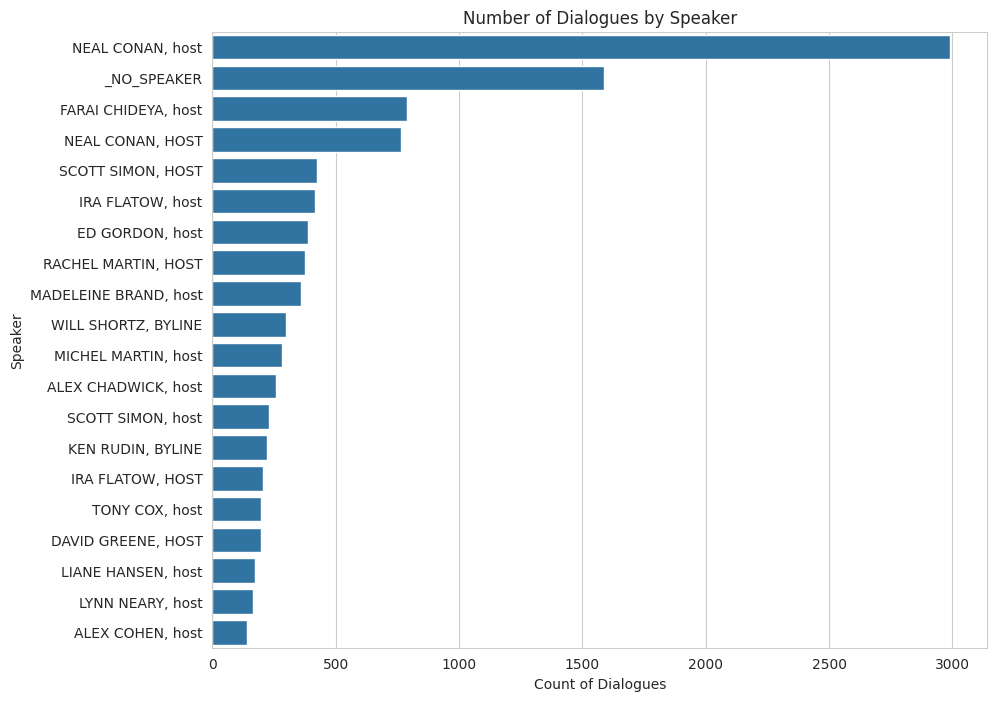

In [ ]:
# Count the number of dialogues for each speaker
speaker_counts = matching_rows['speaker'].value_counts()

# Visualize the top N speakers
top_n_speakers = speaker_counts.head(20)  # Adjust N as needed

plt.figure(figsize=(10, 8))
sns.barplot(y=top_n_speakers.index, x=top_n_speakers.values)
plt.title('Number of Dialogues by Speaker')
plt.xlabel('Count of Dialogues')
plt.ylabel('Speaker')
plt.show()


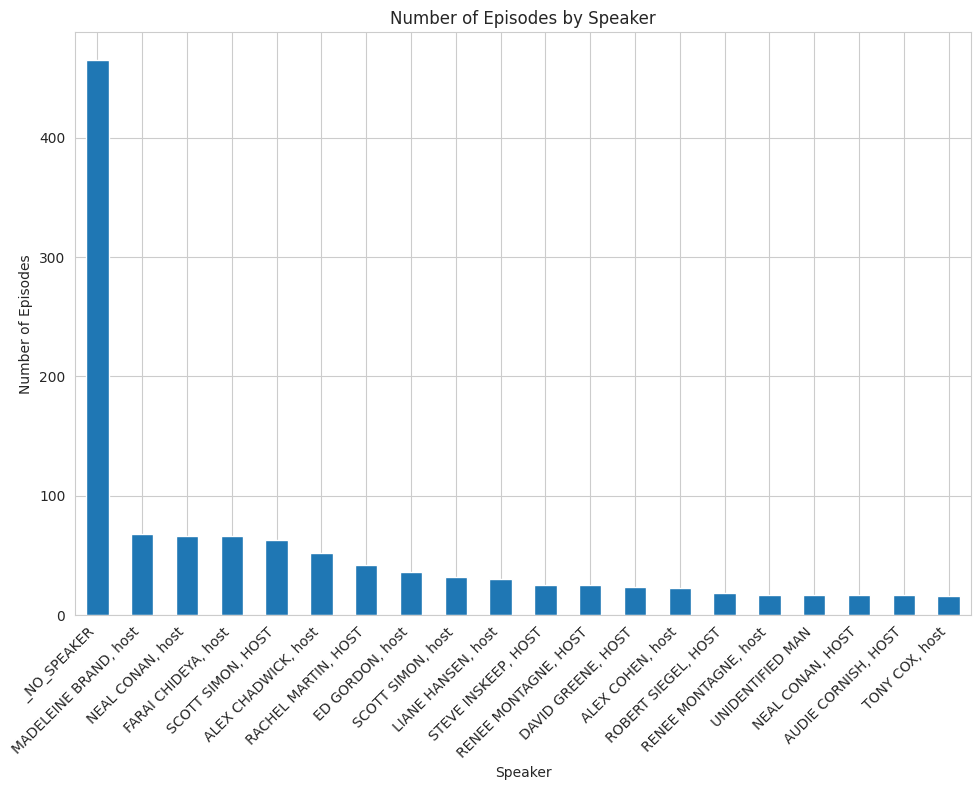

In [ ]:
# Group by 'speaker' and count unique 'episode' values
speaker_episode_count = matching_rows.groupby('speaker')['episode'].nunique()

# Sort the counts in descending order for better visualization
speaker_episode_count_sorted = speaker_episode_count.sort_values(ascending=False)

# Now create a bar plot
plt.figure(figsize=(10, 8))
speaker_episode_count_sorted.head(20).plot(kind='bar')  # Adjust the number as needed
plt.title('Number of Episodes by Speaker')
plt.xlabel('Speaker')
plt.ylabel('Number of Episodes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Count the number of dialogues for each speaker and get the top 10
top_speakers = matching_rows['speaker'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 speakers
top_speaker_dialogues = matching_rows[matching_rows['speaker'].isin(top_speakers)]

# Group by 'speaker' and combine all dialogues into a single string for the top 10 speakers
speaker_dialogues = top_speaker_dialogues.groupby('speaker')['processed_dialogue'].apply(' '.join)

# Create a directory for WordCloud images if it doesn't exist
wordcloud_dir = 'wordclouds'
os.makedirs(wordcloud_dir, exist_ok=True)

# Define a function to generate and save a WordCloud
def generate_and_save_wordcloud(speaker, dialogues, directory):
    # Generate the WordCloud
    wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3,
                          contour_color='steelblue', width=800, height=400).generate(dialogues)

    # Save the WordCloud as an image file
    wordcloud_filename = os.path.join(directory, f"{speaker.replace(' ', '_')}_wordcloud.png")
    wordcloud.to_file(wordcloud_filename)

# Generate and save a WordCloud for each of the top 10 speakers
for speaker in speaker_dialogues.index:
    generate_and_save_wordcloud(speaker, speaker_dialogues[speaker], wordcloud_dir)

print(f"WordClouds for the top 10 speakers saved in '{wordcloud_dir}' directory.")


WordClouds for the top 10 speakers saved in 'wordclouds' directory.


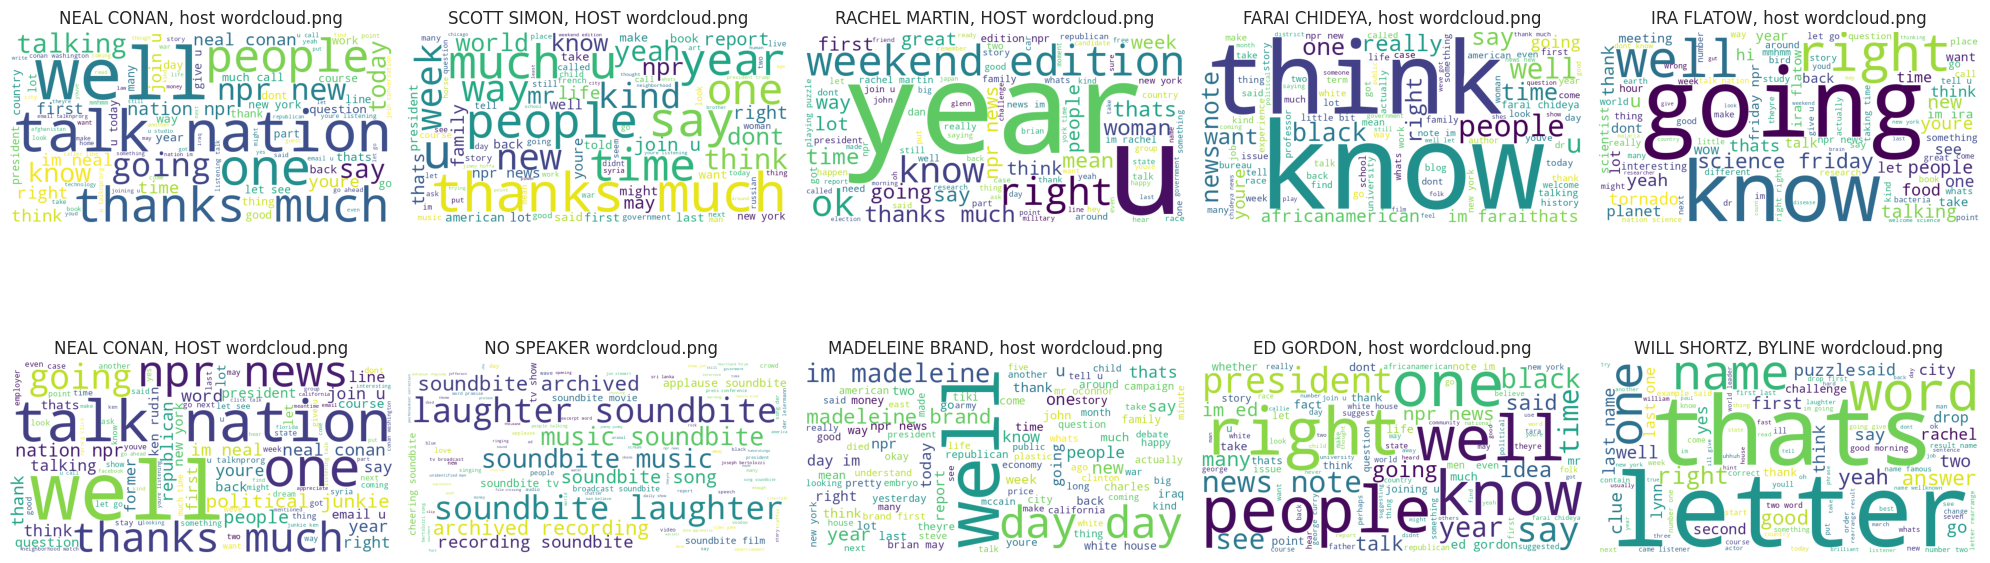

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Set the directory where the WordCloud images are saved
wordcloud_dir = 'wordclouds'

# Get the list of all WordCloud image files saved in the directory
wordcloud_files = [file for file in os.listdir(wordcloud_dir) if file.endswith('.png')]

# Number of images to display - adjust this number if you have more or fewer images
n_images = len(wordcloud_files)

# Define the grid for displaying the images (for example, 2 rows x 5 columns for 10 images)
cols = 5
rows = n_images // cols + (n_images % cols > 0)

# Create a figure to display the images
plt.figure(figsize=(20, rows * 4))  # Adjust the size as needed

for i, file in enumerate(wordcloud_files, 1):
    # Load the image
    img = Image.open(os.path.join(wordcloud_dir, file))

    # Add a subplot for each image
    plt.subplot(rows, cols, i)
    plt.imshow(img)
    plt.axis('off')
    # Extract the speaker's name from the file name for the title
    speaker_name = file.replace('_', ' ').replace('_wordcloud.png', '')
    plt.title(speaker_name)

plt.tight_layout()
plt.show()


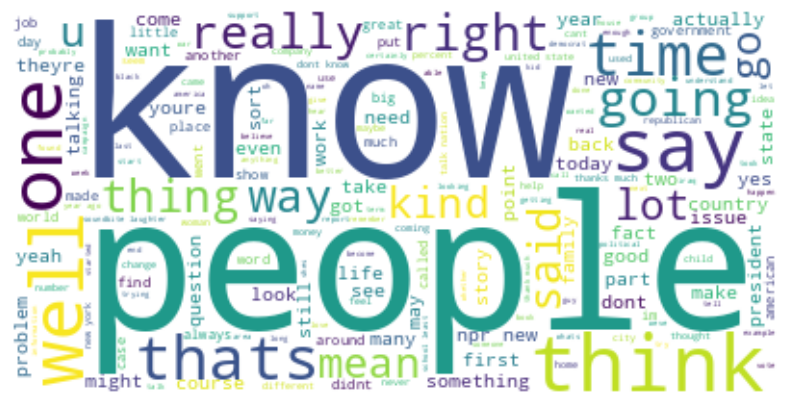

In [ ]:
from wordcloud import WordCloud

# Combine text for WordCloud
text = ' '.join(matching_rows['processed_dialogue'].dropna())

# Generate and display WordCloud
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Fill NaN values with an empty string
matching_rows['processed_dialogue'] = matching_rows['processed_dialogue'].fillna('')

# Now proceed with your TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix1 = tfidf.fit_transform(matching_rows['processed_dialogue'])

In [ ]:
tfidf_matrix1.shape

(30216, 28749)

In [ ]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix1, tfidf_matrix1)

In [ ]:
cosine_sim.shape

(30216, 30216)

In [ ]:
tfidf_matrix = tfidf.fit_transform(sampled_df['processed_ep'])

In [ ]:
cosine_sim1 = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
cosine_sim1.shape

(840, 840)

In [ ]:
def get_recommendations_with_titles(episode_id, cosine_sim=cosine_sim1):
  """
    Retrieves and returns the top 10 most similar episodes to a given episode ID, based on cosine similarity scores.

    This function first finds the index of the specified episode by its ID. Then, it computes the pairwise cosine similarity scores between this episode and all other episodes. It sorts these episodes based on their similarity scores in descending order to find the most similar episodes. The top 10 episodes, excluding the original episode itself, are selected based on these scores.

    Parameters:
    - episode_id: int or str
        The ID of the episode for which recommendations are sought.
    - cosine_sim: ndarray, optional
        A precomputed matrix of cosine similarity scores between episodes. Defaults to `cosine_sim1` if not specified.

    Returns:
    - pandas.DataFrame
        A DataFrame containing the IDs and titles of the top 10 episodes most similar to the specified episode, excluding the episode itself.

    Note:
    The function assumes that the `sampled_df` DataFrame is in the scope and contains the 'id' and 'title' columns, and that `cosine_sim` is a square matrix with dimensions equal to the number of episodes in `sampled_df`.
    """
    # Get the index of the episode that matches the ID
    idx = sampled_df.index[sampled_df['id'] == episode_id].tolist()[0]

    # Get the pairwise similarity scores of all episodes with that episode
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the episodes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar episodes (excluding the first one, as it's the same episode)
    sim_scores = sim_scores[1:11]

    # Get the episode indices
    episode_indices = [i[0] for i in sim_scores]

    # Return the IDs and titles of the top 10 most similar episodes
    return sampled_df[['id', 'title']].iloc[episode_indices]


In [ ]:
# Example usage:
episode_id = 55164   # Replace with the actual ID from your dataset
recommendations_with_titles = get_recommendations_with_titles(episode_id)

print(recommendations_with_titles)


        id                                             title
683  71299         Awards Season for Professional Organizers
621  57388                        Can McCain Boost Campaign?
310  68403                A Lesson In Campaign Mismanagement
601  54884            Another Shakeup in the McCain Campaign
627  65680  Divisions Surface over Calif. Greenhouse Gas Cap
265  75527                  Election Exclamations Nationwide
572   3971             Roundtable: Campaign Imagery In Focus
836  83483           Afghanistan Holds Legislative Elections
656  50268   Controversies Infiltrate Presidential Campaigns
733  77223                 Spain Holds Parliamentry Election


In [ ]:
matching_rows_renamed = matching_rows.rename(columns={'episode': 'id'})

# Merge the two DataFrames on the 'id' column
merged_df = pd.merge(sampled_df, matching_rows_renamed, on='id', how='inner')
merged_df

,id,program,title,episode_date,processed_ep,year,month,day,title_length,episode_order,speaker,processed_dialogue
0,106073,Morning Edition,"In Alabama, A Shortage Of Shelter For Survivors",2011-05-04,alabama shortage shelter survivor,2011,5,4,8,27,MECHELLE HEARD,need place sleep need room lock door safe
1,106073,Morning Edition,"In Alabama, A Shortage Of Shelter For Survivors",2011-05-04,alabama shortage shelter survivor,2011,5,4,8,28,SHAWN SMITH,take bath
2,106073,Morning Edition,"In Alabama, A Shortage Of Shelter For Survivors",2011-05-04,alabama shortage shelter survivor,2011,5,4,8,29,MECHELLE HEARD,take bath
3,106073,Morning Edition,"In Alabama, A Shortage Of Shelter For Survivors",2011-05-04,alabama shortage shelter survivor,2011,5,4,8,30,SHAWN SMITH,clean
4,106073,Morning Edition,"In Alabama, A Shortage Of Shelter For Survivors",2011-05-04,alabama shortage shelter survivor,2011,5,4,8,31,MECHELLE HEARD,know able cook food able sit still peaceful mi...
...,...,...,...,...,...,...,...,...,...,...,...,...
30211,57303,Weekend Edition Sunday,A High Five On The Seven Seas,2014-03-09,high five seven sea,2014,3,9,7,66,"RACHEL MARTIN, HOST",know youve got answer go website nprorgpuzzle ...
30212,57303,Weekend Edition Sunday,A High Five On The Seven Seas,2014-03-09,high five seven sea,2014,3,9,7,67,"RACHEL MARTIN, HOST",dont forget phone number reach time youre winn...
30213,57303,Weekend Edition Sunday,A High Five On The Seven Seas,2014-03-09,high five seven sea,2014,3,9,7,68,"RACHEL MARTIN, HOST",thanks much
30214,57303,Weekend Edition Sunday,A High Five On The Seven Seas,2014-03-09,high five seven sea,2014,3,9,7,69,"WILL SHORTZ, BYLINE",thanks rachel


In [ ]:
# Get a concise summary of the DataFrame
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30216 entries, 0 to 30215
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  30216 non-null  int64         
 1   program             30216 non-null  object        
 2   title               30216 non-null  object        
 3   episode_date        30216 non-null  datetime64[ns]
 4   processed_ep        30216 non-null  object        
 5   year                30216 non-null  int64         
 6   month               30216 non-null  int64         
 7   day                 30216 non-null  int64         
 8   title_length        30216 non-null  int64         
 9   episode_order       30216 non-null  int64         
 10  speaker             30216 non-null  object        
 11  processed_dialogue  30216 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 3.0+ MB
None


In [ ]:
# Summary statistics for numerical columns
print(merged_df.describe())

                  id          year         month           day  title_length  \
count   30216.000000  30216.000000  30216.000000  30216.000000  30216.000000   
mean    58240.057850   2009.814734      6.714059     16.373279      7.094189   
std     32797.191061      3.680051      3.402161      8.665671      2.147159   
min        68.000000   2004.000000      1.000000      1.000000      2.000000   
25%     33492.000000   2007.000000      4.000000      9.000000      6.000000   
50%     61676.000000   2009.000000      7.000000     17.000000      7.000000   
75%     77764.000000   2012.000000     10.000000     24.000000      8.000000   
max    140370.000000   2019.000000     12.000000     31.000000     18.000000   

       episode_order  
count   30216.000000  
mean       38.370830  
std        40.616643  
min         0.000000  
25%        10.000000  
50%        22.000000  
75%        53.000000  
max       251.000000  


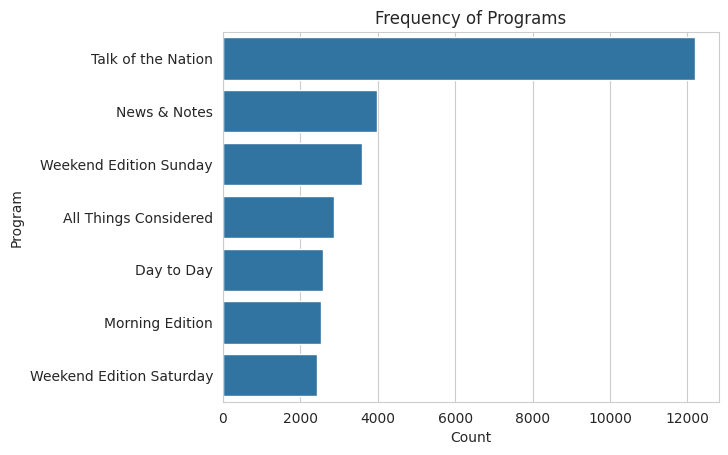

In [ ]:
# Assuming 'program' is a categorical column in merged_df
sns.countplot(y='program', data=merged_df, order=merged_df['program'].value_counts().index)
plt.title('Frequency of Programs')
plt.xlabel('Count')
plt.ylabel('Program')
plt.show()

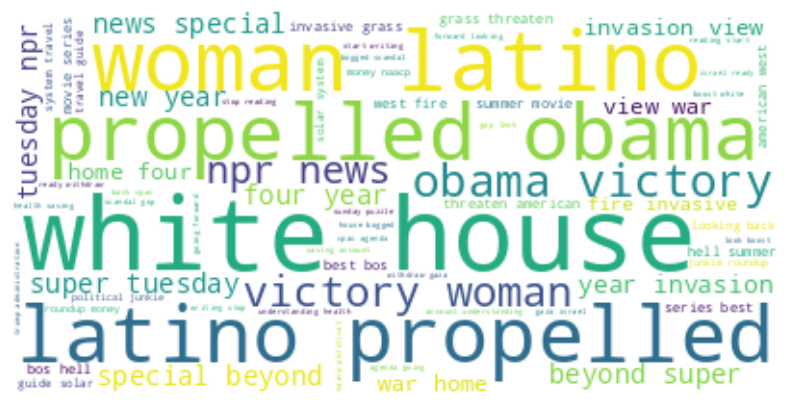

In [ ]:
from wordcloud import WordCloud

# Combine all dialogues into a single string
all_dialogues = ' '.join(merged_df['processed_ep'].dropna())

# Generate and display a WordCloud
wordcloud = WordCloud(background_color='white', max_words=100).generate(all_dialogues)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from sklearn.metrics.pairwise import linear_kernel
def recommend_episodes_by_keyword(keyword, tfidf_matrix, matching_rows, sampled_df, top_n=5):
  """
    Recommends episodes based on a keyword by utilizing a TF-IDF matrix and cosine similarity.

    This function finds episodes most closely related to the given keyword. It computes cosine
    similarities between the keyword vector (transformed into TF-IDF space) and all episode vectors
    in the provided TF-IDF matrix. It then selects the top_n episodes with the highest cosine
    similarity scores. If fewer than top_n episodes are initially selected, additional episodes are
    chosen based on descending similarity scores to fill the quota.

    Parameters:
    - keyword: str
        The keyword used to find similar episodes.
    - tfidf_matrix: sparse matrix
        The TF-IDF matrix representing the text data of all episodes.
    - matching_rows: pandas.DataFrame
        A DataFrame mapping episodes to their indices in the TF-IDF matrix.
    - sampled_df: pandas.DataFrame
        The DataFrame containing episode details such as 'id' and 'title'.
    - top_n: int, optional
        The number of recommendations to return (default is 5).

    Returns:
    - pandas.DataFrame
        A DataFrame with the 'id' and 'title' of the recommended episodes, sorted by their
        similarity score in descending order. If additional episodes are added to meet the
        top_n criteria, they are included based on their similarity scores.

    Note:
    This function assumes the presence of a pre-trained TF-IDF transformer ('tfidf') available
    in the scope for transforming the keyword into its vector representation.
    """
    keyword_vector = tfidf.transform([keyword])
    cosine_similarities = linear_kernel(keyword_vector, tfidf_matrix).flatten()
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]

    recommended_episode_ids = matching_rows.iloc[top_indices]['episode'].values

    # Initial recommendations from sampled_df
    recommended_episodes = sampled_df[sampled_df['id'].isin(recommended_episode_ids)]

    episode_similarity_score = {row['episode']: score for row, score in zip(matching_rows.iloc[top_indices].to_dict('records'), cosine_similarities[top_indices])}
    recommended_episodes['similarity_score'] = recommended_episodes['id'].map(episode_similarity_score)
    recommended_episodes = recommended_episodes.sort_values(by='similarity_score', ascending=False)

    new_surprising_ids = []  # Initialize the variable to ensure it's always defined
    # Check if we have fewer than top_n recommendations
    if len(recommended_episodes) < top_n:
        # Potential pool for surprising elements, excluding already chosen indices
        potential_surprise_indices = [i for i in cosine_similarities.argsort() if i not in top_indices]
        surprising_indices = potential_surprise_indices[:top_n - len(recommended_episodes) + 5]  # Adjust based on need

        surprising_episode_ids = matching_rows.iloc[surprising_indices]['episode'].values
        # Exclude episodes already recommended
        new_surprising_ids = [id_ for id_ in surprising_episode_ids if id_ not in recommended_episode_ids]

    if new_surprising_ids:
        surprising_episodes = sampled_df[sampled_df['id'].isin(new_surprising_ids)]
        surprising_episodes['similarity_score'] = surprising_episodes['id'].map(lambda x: episode_similarity_score.get(x, 0))
        surprising_episodes = surprising_episodes.sort_values(by='similarity_score', ascending=False)
        recommended_episodes = pd.concat([recommended_episodes, surprising_episodes]).drop_duplicates('id').head(top_n)

    return recommended_episodes[['id', 'title']]


In [ ]:
# Example usage
keyword = "Puzzle"  # Replace with your actual keyword
tfidf_matrix2 = tfidf.fit_transform(matching_rows['processed_dialogue'])
top_episodes = recommend_episodes_by_keyword(keyword, tfidf_matrix2, matching_rows, sampled_df)

<ipython-input-61-5532d82c1199>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_episodes['similarity_score'] = recommended_episodes['id'].map(episode_similarity_score)
<ipython-input-61-5532d82c1199>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surprising_episodes['similarity_score'] = surprising_episodes['id'].map(lambda x: episode_similarity_score.get(x, 0))


In [ ]:
# Aggregate titles from the recommended episodes
text_data = ' '.join(top_episodes['title'])

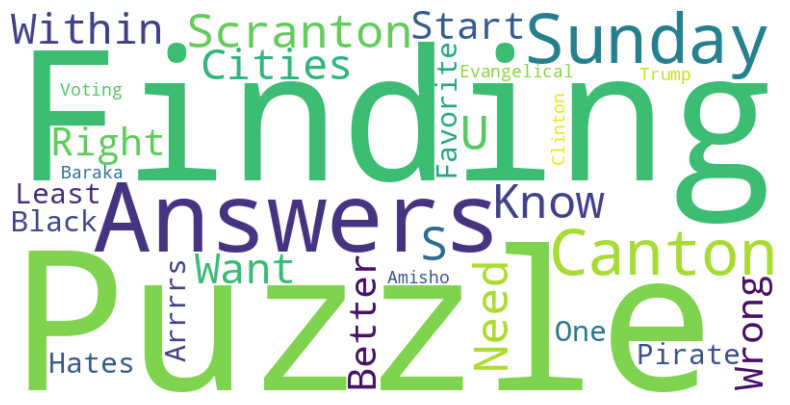

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue', width=800, height=400).generate(text_data)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it tidy
plt.show()

In [ ]:
print(top_episodes)

        id                                              title
754   8962  Sunday Puzzle: From Canton To Scranton, You Ne...
726  56513                         Finding The Answers Within
770  35032  Want To Get These Answers Right? Better Start ...
759  52172  What's A Pirate's Least-Favorite Puzzle? One T...
70   80598  Black Evangelical Amisho Baraka: Why I'm Not V...
